In [30]:
import cmdstanpy
from cmdstanpy import CmdStanModel
cmdstanpy.install_cmdstan()


Installing CmdStan version: 2.29.1
Install directory: /Users/patryktomaszewski/.cmdstan
CmdStan version 2.29.1 already installed


True

In [5]:
import matplotlib.pyplot as plt

In [6]:
stanModel = CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:compiling stan file /Users/patryktomaszewski/studies/bachelor1/data analitycs/Data-Analytics-labs/Lab 1 - Python review/bern_1.stan to exe file /Users/patryktomaszewski/studies/bachelor1/data analitycs/Data-Analytics-labs/Lab 1 - Python review/bern_1
INFO:cmdstanpy:compiled model executable: /Users/patryktomaszewski/studies/bachelor1/data analitycs/Data-Analytics-labs/Lab 1 - Python review/bern_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmp472yyba3/tmphate1ayn.hpp /var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmp472yyba3/tmphate1ayn.stan
Warning in '/var/folders/4p/0qz7dp9d0z77llrj1f8zbg1w0000gn/T/tmp472yyba3/tmphate1ayn.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling,

In [7]:
ds = {
 "N" : 17,
 "y" : [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
}

In [31]:
stan_fit = stanModel.sample(data=ds, output_dir='results')

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [11]:
theta_col_array = stan_fit.stan_variable('theta')

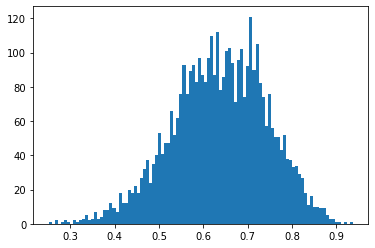

In [21]:

plt.hist(theta_col_array, bins = 100)
plt.show()

In [24]:
summary = stan_fit.summary()
summary.head()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-13.00,0.0160,0.72,-14.00,-13.00,-13.00,1900.0,36000.0,1.0
theta,0.64,0.0027,0.11,0.46,0.64,0.81,1500.0,28000.0,1.0


In [26]:
theta = summary.loc["theta"]
theta_mean = theta["Mean"]
theta_median = theta["50%"]
theta_quantity_5 = theta["5%"]
theta_quantity_95 = theta["95%"]

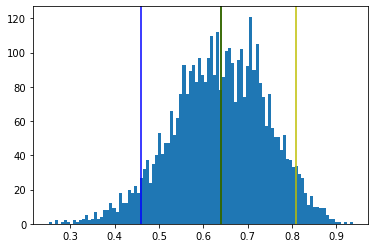

In [29]:
plt.hist(theta_col_array, bins = 100)
plt.axvline(x=theta_mean, color='r')
plt.axvline(x=theta_median, color='g')
plt.axvline(x=theta_quantity_5, color='b')
plt.axvline(x=theta_quantity_95, color='y')
plt.show()